## Intrinsic Dimensionality and the Dimension of a Subspace
Navid Shokouhi, 2018

This document is to designed to understand the connection between intrinsic dimensionality as defined in [1] and the familiar signal processing notion of dimensionality. In signal processing, it is often useful to project data onto a lower dimensional subspace of known charectiristics in order to mitigate the effect of noise and interference. This is mainly because the signal component is assumed to come from a subspace of the original feature space. Examples include Fourier Transforms, Wavelet Transforms, PCA, etc. 

In the experiment, we will consider a simple case, were data is defined in 3-D Cartesian space. However, the majority of data is concentrated on the surface of a 2-D circle. 

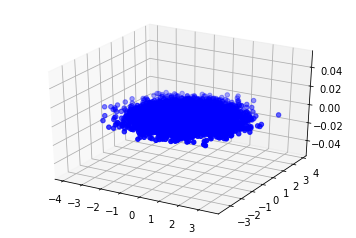

In [1]:
import numpy as np
n = 10000
x = np.random.randn(n,1)
y = np.random.randn(n,1)
z = np.zeros((n,1))
X = np.hstack((x,y,z))
X=np.random.randn(n,3)
X[:,2] = 0*X[:,2]
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],color='b')
plt.show()

### Intrinsic dimensionality
Local intrinsic dimensionality with respect to a reference point (in our case $[0,0,0]^T$) can be approximately calculated on some distance measure $r$ that has certain characteristcs [1]. Defining $k_i$ as the number of samples in the ball of radius $r=r_i$ (for $i=1,2$) in our feature space. We have [1]:
$$
ID = \frac{\log k_2−\log k_1}{\log r_2 −\log r1}
$$

In our simulation:

In [2]:
def dist(X1):
    """Euclidean norm distance w.r.t origin """
    X2=np.zeros((1,X1.shape[1]))
    return np.linalg.norm(X1-X2,axis=1)

def ged(k1,k2,r1,r2):
    """Generalized expansion dimension.
    This measure provides an upper bound for 
    intrinsic dimension [1].
    
    Inputs:
        k1,k2:  number of samples 
    """
    return (np.log(k1+1) - np.log(k2+1))/(np.log(r1)-np.log(r2))

def plot_dim(X,radii=np.arange(0.5,1,0.01),eps = 0.1):
    """plot the estimated dimension using r1,r2, where 
    r2 = r1 + eps
    for a range of radii."""
    estimated_dim = []
    for r1 in radii:
        r2 = r1 + eps 
        k1 = np.where(dist(X)<r1)[0].shape[0]
        k2 = np.where(dist(X)<r2)[0].shape[0]
        estimated_dim.append(ged(k1,k2,r1,r2))
    plt.plot(radii,estimated_dim)
    plt.title('avg dimension: '+str(np.mean(np.array(estimated_dim))))
    plt.show()

Trying for different $r$ with increments of $\epsilon=0.1$:

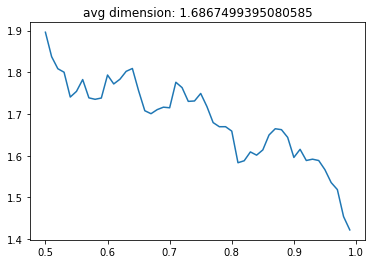

In [3]:
plot_dim(X)

If we repeat the experiment, with a different dataset in which the z-dimension is non-zero, that is:

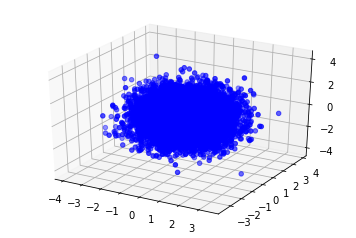

In [4]:
X[:,2] = np.random.randn(n,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],color='b')
plt.show()

Then, the dimension approaches 3:

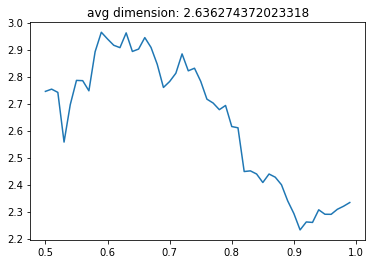

In [5]:
plot_dim(X)

## References
[1] Houle, Michael E. "Dimensionality, discriminability, density and distance distributions." Data Mining Workshops (ICDMW), 2013 IEEE 13th International Conference on. IEEE, 2013.